In [1]:
import hgfp
import torch
import dgl

In [2]:
element_to_idx = {b'BR': 0, b'C': 1, b'C2': 2, b'CA': 3, b'CB': 4, b'CC': 5, b'CJ': 6, b'CL': 7, b'CM': 8, b'CP': 9, b'CR': 10, b'CT': 11, b'CW': 12, b'Cstar': 13, b'F': 14, b'H': 15, b'H1': 16, b'H2': 17, b'H3': 18, b'H4': 19, b'H5': 20, b'HA': 21, b'HC': 22, b'HO': 23, b'HP': 24, b'HX': 25, b'I': 26, b'N': 27, b'N2': 28, b'N3': 29, b'NA': 30, b'NB': 31, b'NC': 32, b'NL': 33, b'Nstar': 34, b'Nu': 35, b'O': 36, b'O2': 37, b'OH': 38, b'OS': 39, b'Ou': 40, b'P': 41, b'S': 42, b'SO': 43, b'Su': 44}

In [3]:
idx_to_element = {v: k.decode("utf-8") for k, v in element_to_idx.items()}

In [4]:
ds = list(hgfp.data.parm_at_Frosst.df.batched(num=100, batch_size=16))

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [5]:
print(len(ds))

6


In [6]:
ds_tr, ds_vl, ds_te = hgfp.data.utils.split(ds, 1, 1)

In [7]:
class Classifier(torch.nn.Module):
    def __init__(self, in_dim=128, out_dim=256, n_classes=45):
        super(Classifier, self).__init__()
        self.d = torch.nn.Linear(in_dim, out_dim)
        self.c = torch.nn.Linear(out_dim, n_classes)
        
    def forward(self, g):
        h_v = g.nodes['atom'].data['h']
        y_hat = self.c(
                torch.nn.functional.sigmoid(
                    self.d(
                        h_v)))
        
        return y_hat
        

In [8]:
net = hgfp.models.gcn_with_combine_readout.Net([128, 128, 128])
# net = Net()
# net = BaseLine()
classifier = Classifier()

In [9]:
print(net.exes)

['d0', 'd1', 'd2']


In [10]:
opt = torch.optim.Adam(list(net.parameters()) + list(classifier.parameters()), 1e-3)

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()

In [12]:
for _ in range(500):
    for g, y in ds_tr:
        opt.zero_grad()
        y_hat = classifier(net(g, return_graph=True))
        # y_hat = net(g)
        loss = loss_fn(y_hat, torch.where(torch.gt(y, 0))[1])
        print(loss)
        loss.backward()
        opt.step()

/Users/yuanqingwang/miniconda3/envs/env1/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(3.8886, grad_fn=<NllLossBackward>)
tensor(3.6467, grad_fn=<NllLossBackward>)
tensor(3.5372, grad_fn=<NllLossBackward>)
tensor(3.3518, grad_fn=<NllLossBackward>)
tensor(3.2287, grad_fn=<NllLossBackward>)
tensor(3.1851, grad_fn=<NllLossBackward>)
tensor(3.0611, grad_fn=<NllLossBackward>)
tensor(2.9928, grad_fn=<NllLossBackward>)
tensor(2.9202, grad_fn=<NllLossBackward>)
tensor(2.9434, grad_fn=<NllLossBackward>)
tensor(2.8796, grad_fn=<NllLossBackward>)
tensor(2.8663, grad_fn=<NllLossBackward>)
tensor(2.8170, grad_fn=<NllLossBackward>)
tensor(2.9074, grad_fn=<NllLossBackward>)
tensor(2.8240, grad_fn=<NllLossBackward>)
tensor(2.8258, grad_fn=<NllLossBackward>)
tensor(2.7723, grad_fn=<NllLossBackward>)
tensor(2.9027, grad_fn=<NllLossBackward>)
tensor(2.8006, grad_fn=<NllLossBackward>)
tensor(2.8066, grad_fn=<NllLossBackward>)
tensor(2.7657, grad_fn=<NllLossBackward>)
tensor(2.8968, grad_fn=<NllLossBackward>)
tensor(2.7902, grad_fn=<NllLossBackward>)
tensor(2.7888, grad_fn=<NllLossBac

tensor(2.8572, grad_fn=<NllLossBackward>)
tensor(2.7659, grad_fn=<NllLossBackward>)
tensor(2.7651, grad_fn=<NllLossBackward>)
tensor(2.7286, grad_fn=<NllLossBackward>)
tensor(2.8578, grad_fn=<NllLossBackward>)
tensor(2.7662, grad_fn=<NllLossBackward>)
tensor(2.7649, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8580, grad_fn=<NllLossBackward>)
tensor(2.7662, grad_fn=<NllLossBackward>)
tensor(2.7648, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8579, grad_fn=<NllLossBackward>)
tensor(2.7662, grad_fn=<NllLossBackward>)
tensor(2.7648, grad_fn=<NllLossBackward>)
tensor(2.7284, grad_fn=<NllLossBackward>)
tensor(2.8577, grad_fn=<NllLossBackward>)
tensor(2.7661, grad_fn=<NllLossBackward>)
tensor(2.7647, grad_fn=<NllLossBackward>)
tensor(2.7286, grad_fn=<NllLossBackward>)
tensor(2.8575, grad_fn=<NllLossBackward>)
tensor(2.7660, grad_fn=<NllLossBackward>)
tensor(2.7647, grad_fn=<NllLossBackward>)
tensor(2.7287, grad_fn=<NllLossBac

tensor(2.8571, grad_fn=<NllLossBackward>)
tensor(2.7655, grad_fn=<NllLossBackward>)
tensor(2.7643, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8570, grad_fn=<NllLossBackward>)
tensor(2.7655, grad_fn=<NllLossBackward>)
tensor(2.7643, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8570, grad_fn=<NllLossBackward>)
tensor(2.7654, grad_fn=<NllLossBackward>)
tensor(2.7644, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8570, grad_fn=<NllLossBackward>)
tensor(2.7655, grad_fn=<NllLossBackward>)
tensor(2.7643, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8570, grad_fn=<NllLossBackward>)
tensor(2.7655, grad_fn=<NllLossBackward>)
tensor(2.7643, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBackward>)
tensor(2.8570, grad_fn=<NllLossBackward>)
tensor(2.7655, grad_fn=<NllLossBackward>)
tensor(2.7643, grad_fn=<NllLossBackward>)
tensor(2.7281, grad_fn=<NllLossBac

tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7280, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7280, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7280, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7280, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7280, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7280, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBac

tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBac

tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7653, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBac

tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7279, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8568, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBac

tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBac

tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBackward>)
tensor(2.8567, grad_fn=<NllLossBackward>)
tensor(2.7652, grad_fn=<NllLossBackward>)
tensor(2.7641, grad_fn=<NllLossBackward>)
tensor(2.7278, grad_fn=<NllLossBac

tensor(2.7660, grad_fn=<NllLossBackward>)
tensor(2.7667, grad_fn=<NllLossBackward>)
tensor(2.7275, grad_fn=<NllLossBackward>)
tensor(2.8607, grad_fn=<NllLossBackward>)
tensor(2.7657, grad_fn=<NllLossBackward>)
tensor(2.7659, grad_fn=<NllLossBackward>)
tensor(2.7277, grad_fn=<NllLossBackward>)
tensor(2.8605, grad_fn=<NllLossBackward>)
tensor(2.7661, grad_fn=<NllLossBackward>)
tensor(2.7645, grad_fn=<NllLossBackward>)
tensor(2.7290, grad_fn=<NllLossBackward>)
tensor(2.8588, grad_fn=<NllLossBackward>)
tensor(2.7669, grad_fn=<NllLossBackward>)
tensor(2.7639, grad_fn=<NllLossBackward>)
tensor(2.7307, grad_fn=<NllLossBackward>)
tensor(2.8569, grad_fn=<NllLossBackward>)
tensor(2.7671, grad_fn=<NllLossBackward>)
tensor(2.7640, grad_fn=<NllLossBackward>)
tensor(2.7312, grad_fn=<NllLossBackward>)
tensor(2.8565, grad_fn=<NllLossBackward>)
tensor(2.7666, grad_fn=<NllLossBackward>)
tensor(2.7646, grad_fn=<NllLossBackward>)
tensor(2.7301, grad_fn=<NllLossBackward>)
tensor(2.8576, grad_fn=<NllLossBac

tensor(2.7656, grad_fn=<NllLossBackward>)
tensor(2.7643, grad_fn=<NllLossBackward>)
tensor(2.7284, grad_fn=<NllLossBackward>)
tensor(2.8573, grad_fn=<NllLossBackward>)
tensor(2.7656, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)
tensor(2.7284, grad_fn=<NllLossBackward>)
tensor(2.8573, grad_fn=<NllLossBackward>)
tensor(2.7656, grad_fn=<NllLossBackward>)
tensor(2.7642, grad_fn=<NllLossBackward>)


In [ ]:
print(torch.argmax(y_hat, dim=1))
print(torch.argmax(y, dim=1))

In [60]:
net.eval()
from sklearn.metrics import confusion_matrix
for g, y in ds_tr:
    y_hat = torch.argmax(classifier(net(g, return_graph=True)), dim=1)
    y = torch.argmax(y, dim=1)
    

In [61]:
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix(y, y_hat, labels=list(range(1, 46))),
    [v for k, v in idx_to_element.items()],
    [v for k, v in idx_to_element.items()])

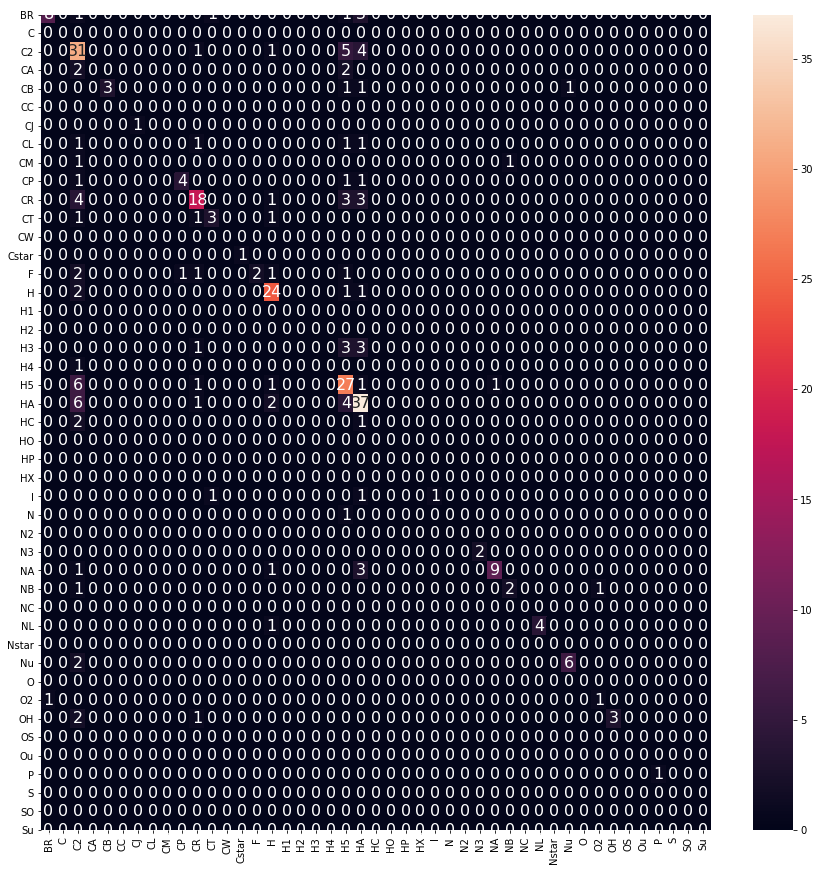

In [62]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()